# I] Import and options


In [58]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'xtick.labelsize':20, 
                            'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [59]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [60]:
%%time
#DL + open
path = input_file_directory + "mefs/mefs_proliferation/exp3_proliferation.csv"
prolif_df = pandas.read_csv(path, sep = ";")
#change comma to dot
prolif_df = prolif_df.astype(str)
prolif_df = prolif_df.apply(lambda x: x.str.replace(',','.'))
#convert to float
prolif_df = prolif_df.astype(float)
prolif_df = prolif_df.iloc[:31,:]
print(prolif_df.shape)
prolif_df.tail()

(21, 49)
Wall time: 23.9 ms


Elapsed  Normal + DMEM + DMSO  EV + DMEM + DMSO  WT1 + DMEM + DMSO  \
16     32.0              66.95657          56.66178           58.66779   
17     34.0              69.25909          75.22632           76.66278   
18     36.0              73.78409          65.96655           66.62367   
19     38.0              80.57106          64.94678           73.34218   
20     40.0              78.74565          73.85188           77.45860   

    dVSR(1) + DMEM + DMSO  WT2 + DMEM + DMSO  dVSR(2) + DMEM + DMSO  \
16               67.66946           68.16912               77.41238   
17               82.59960           83.59840               87.32021   
18               76.79001           79.65472               86.71921   
19               88.03574           89.06725               94.28854   
20               83.89312           83.25977               89.39846   

    Normal + DMEM + BAF  EV + DMEM + BAF  WT1 + DMEM + BAF  ...  \
16             47.11825         42.22197          43.53107  ...   
17             50.07435         37.85205          38.92245  ...   
18             46.30105         39.96524          39.64922  ...   
19             49.53020         43.21371          41.41597  ...   
20             41.07077         33.97165          32.36975  ...   

    WT1 + Starvation + DMSO (Std Err Img)  \
16                               9.287899   
17                              16.665550   
18                               9.987211   
19                              11.514550   
20                              15.012500   

    dVSR(1) + Starvation + DMSO (Std Err Img)  \
16                                   2.716726   
17                                   7.985293   
18                                   2.947760   
19                                   2.930858   
20                                   3.291835   

    WT2 + Starvation + DMSO (Std Err Img)  \
16                               4.502647   
17                               8.357716   
18                               6.226460   
19                               6.041761   
20                               4.642512   

    dVSR(2) + Starvation + DMSO (Std Err Img)  \
16                                   9.906205   
17                                  13.209720   
18                                  11.199780   
19                                  12.926650   
20                                  10.643740   

    Normal + Starvation + BAF (Std Err Img)  \
16                                 3.490765   
17                                 5.318291   
18                                 3.357033   
19                                 3.832351   
20                                 3.702552   

    EV + Starvation + BAF (Std Err Img)  WT1 + Starvation + BAF (Std Err Img)  \
16                             4.623534                              2.028327   
17                             6.394738                              1.901698   
18                             5.039723                              2.245246   
19                             6.217012                              1.688375   
20                             3.847496                              1.407975   

    dVSR(1) + Starvation + BAF (Std Err Img)  \
16                                  3.902300   
17                                  4.355252   
18                                  4.979893   
19                                  6.010711   
20                                  5.896440   

    WT2 + Starvation + BAF (Std Err Img)  \
16                              5.007692   
17                              5.685599   
18                              5.926261   
19                              7.186559   
20                              4.291053   

    dVSR(2) + Starvation + BAF (Std Err Img)  
16                                  2.468532  
17                                  1.827575  
18                                  2.070645  
19                                  1.971271  
20                                  1.

In [61]:
#List of columns_ I have 6 cell lines per condition and 4 conditions

##select RICH DMEM with only dmso
prolif_rich_DMSO = prolif_df.iloc[:,1:7].columns
##select RICH DMEM with only baf
prolif_rich_BAF = prolif_df.iloc[:,7:13].columns
##df with STARV with only dmso
prolif_starv_DMSO = prolif_df.iloc[:,13:19].columns
##df with STARV with only baf
prolif_starv_BAF = prolif_df.iloc[:,19:25].columns

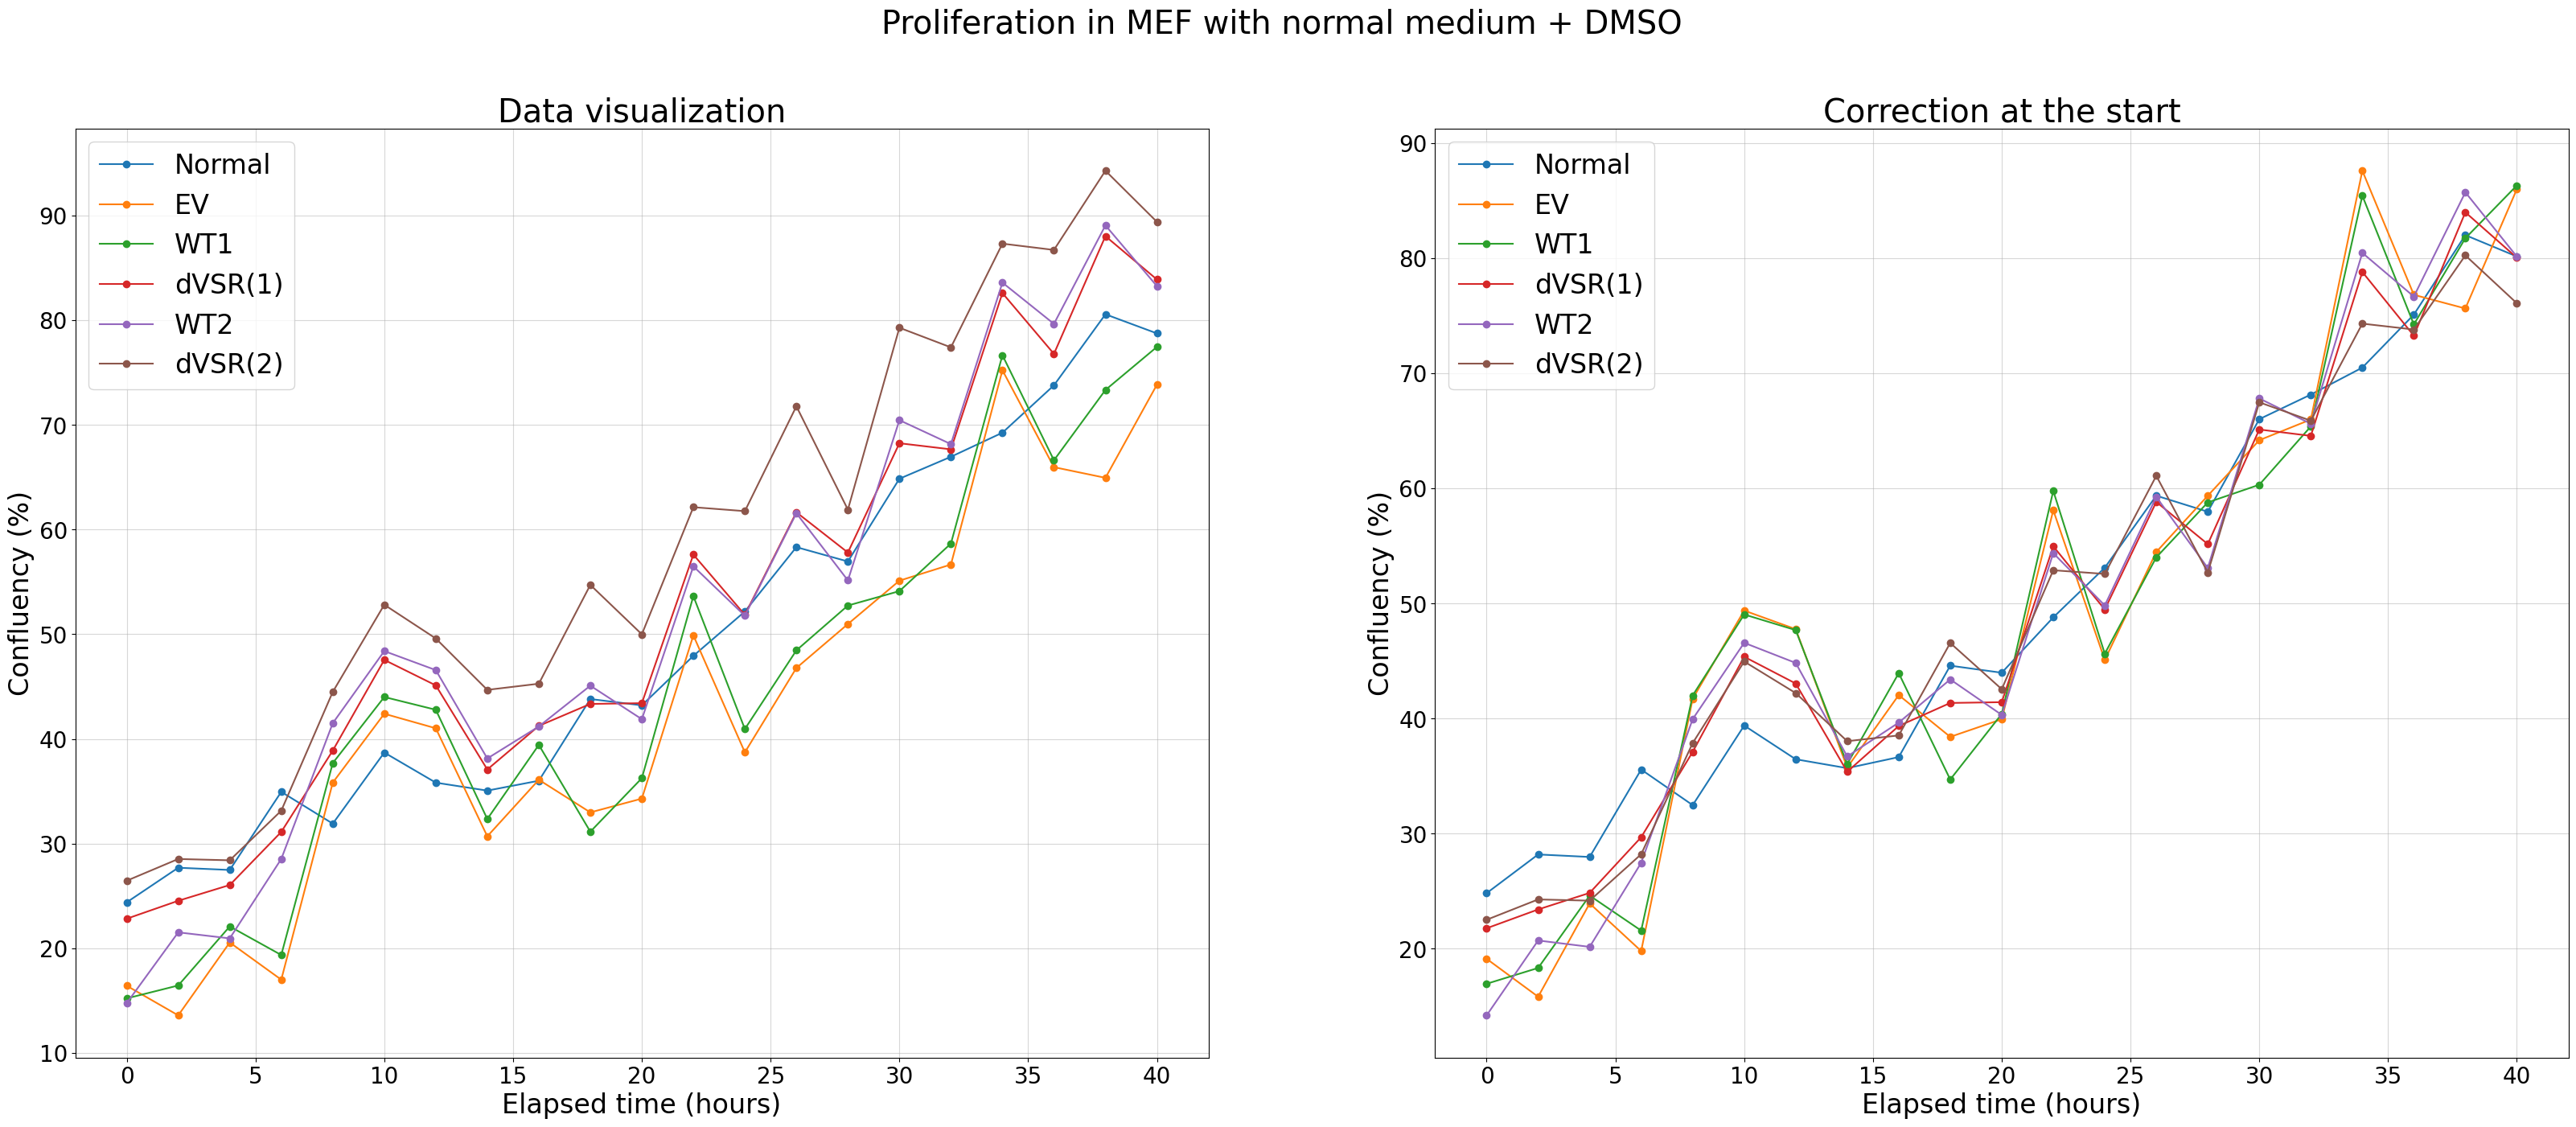

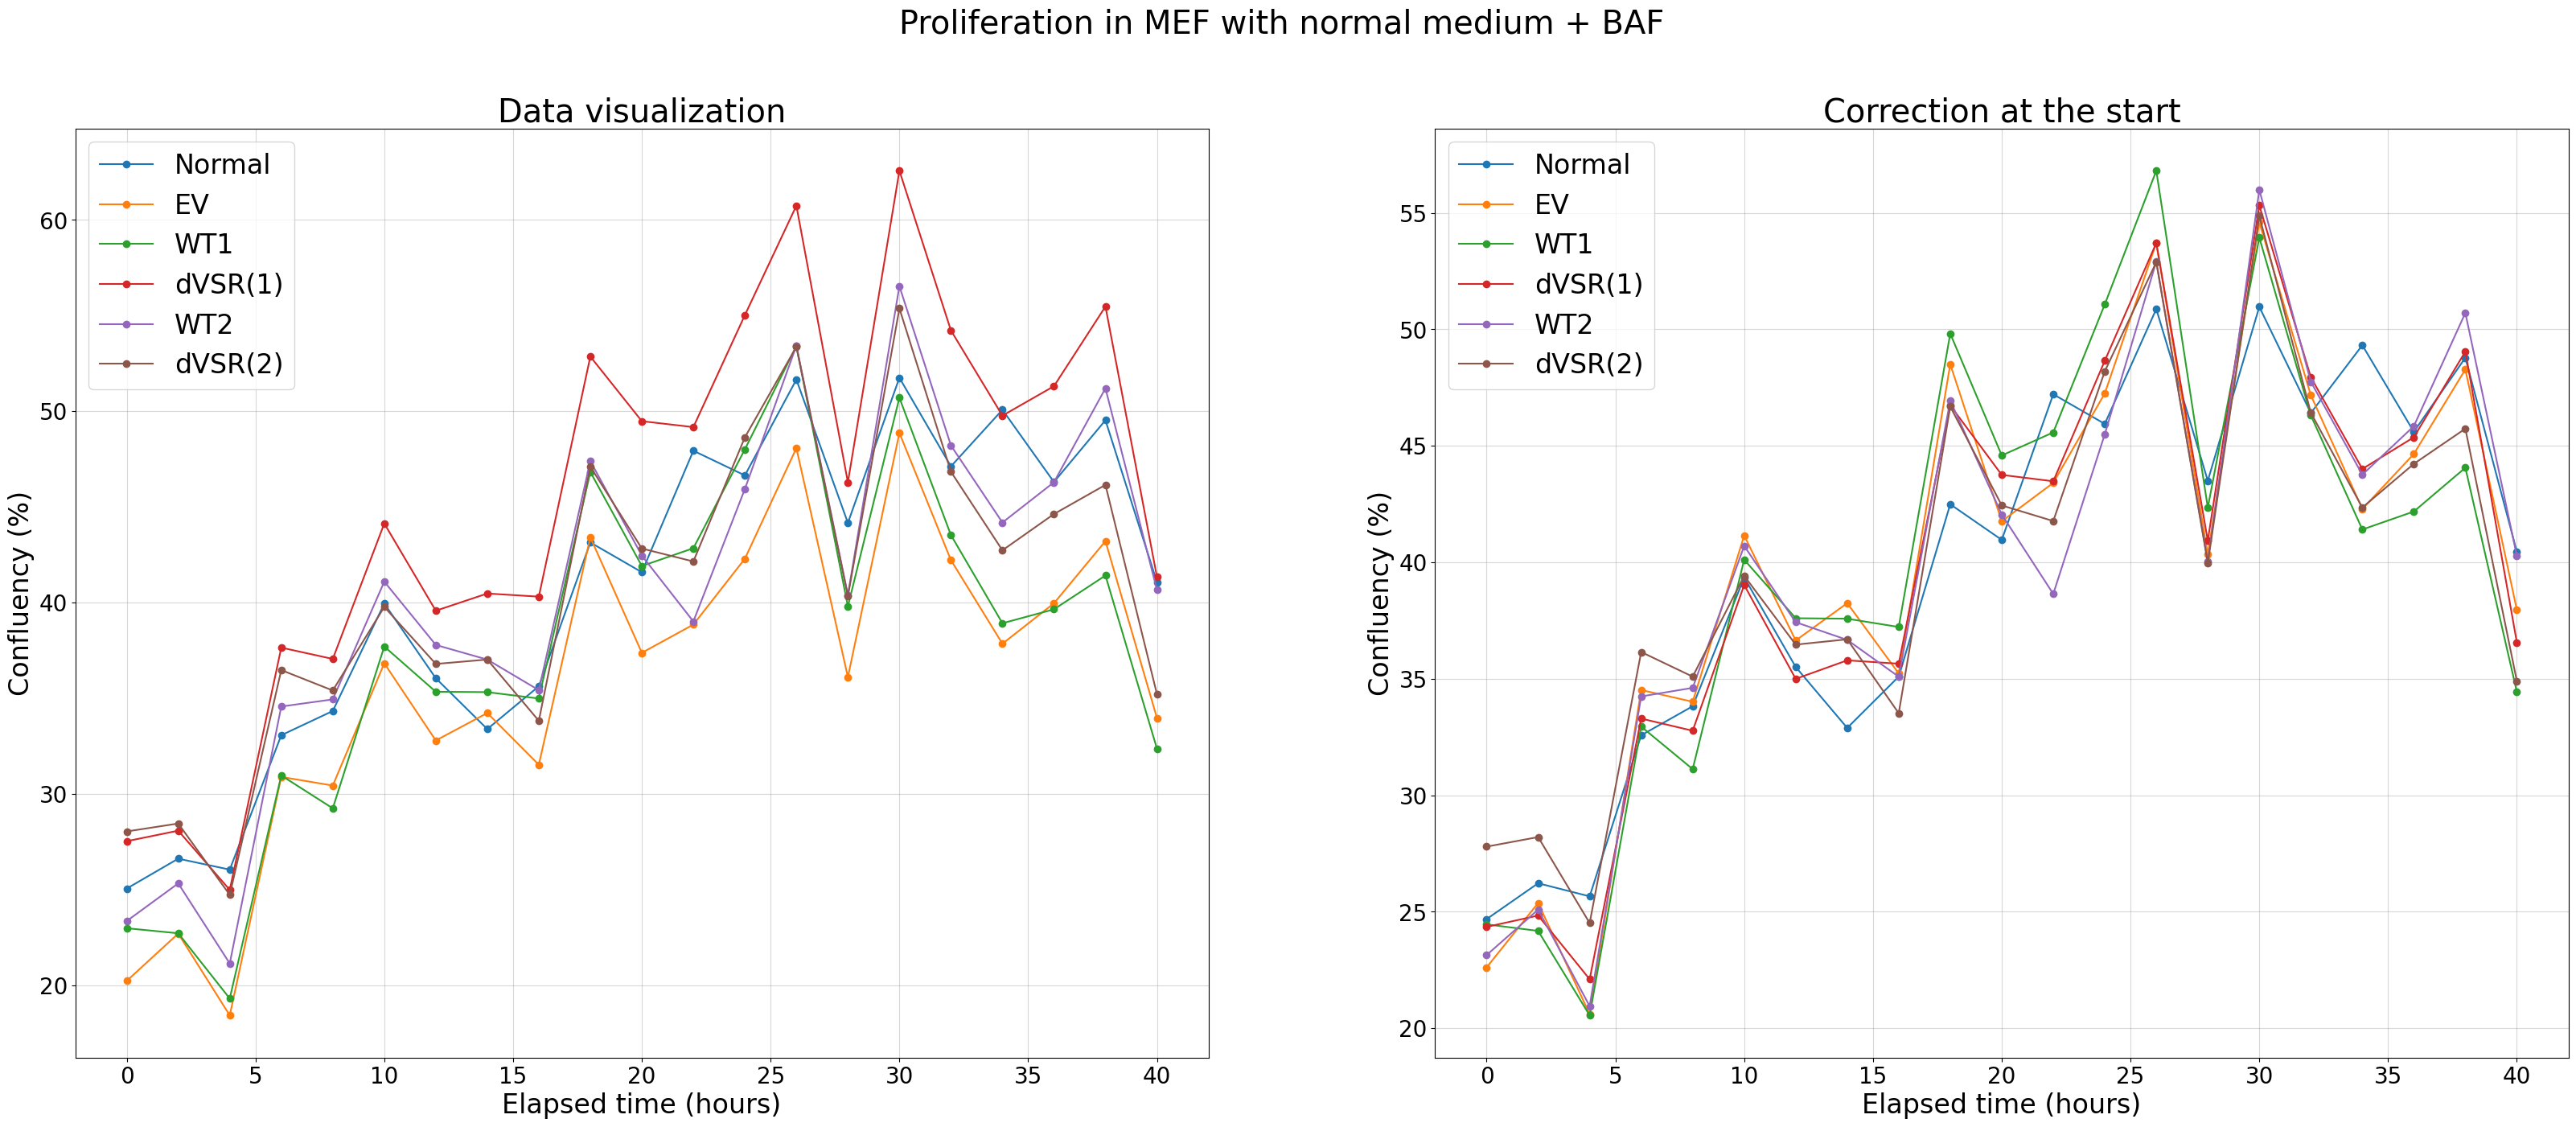

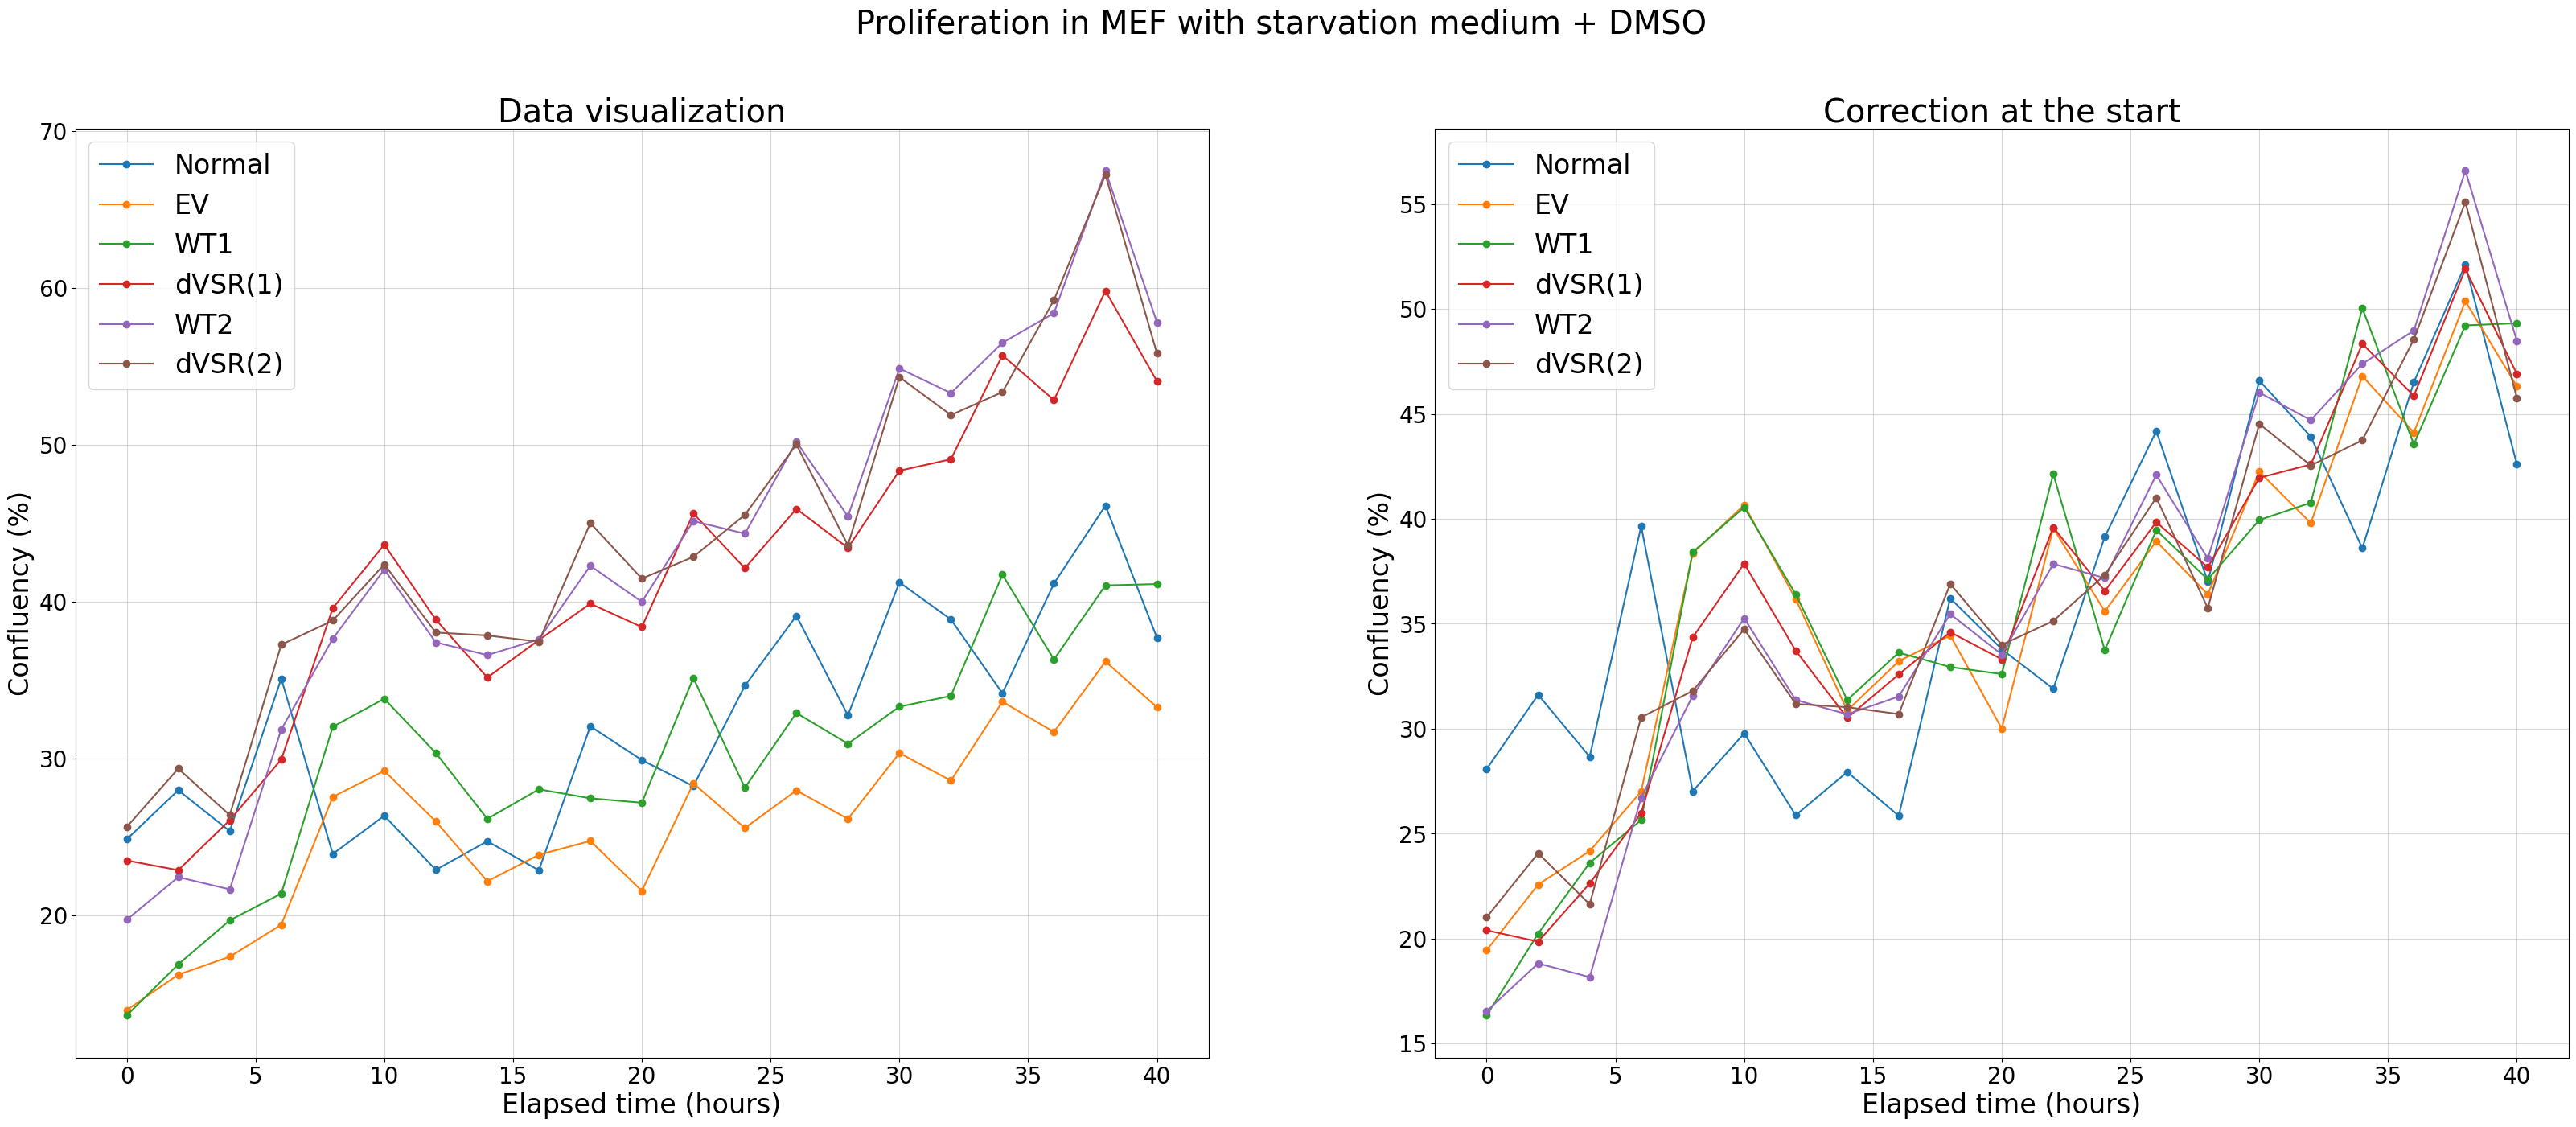

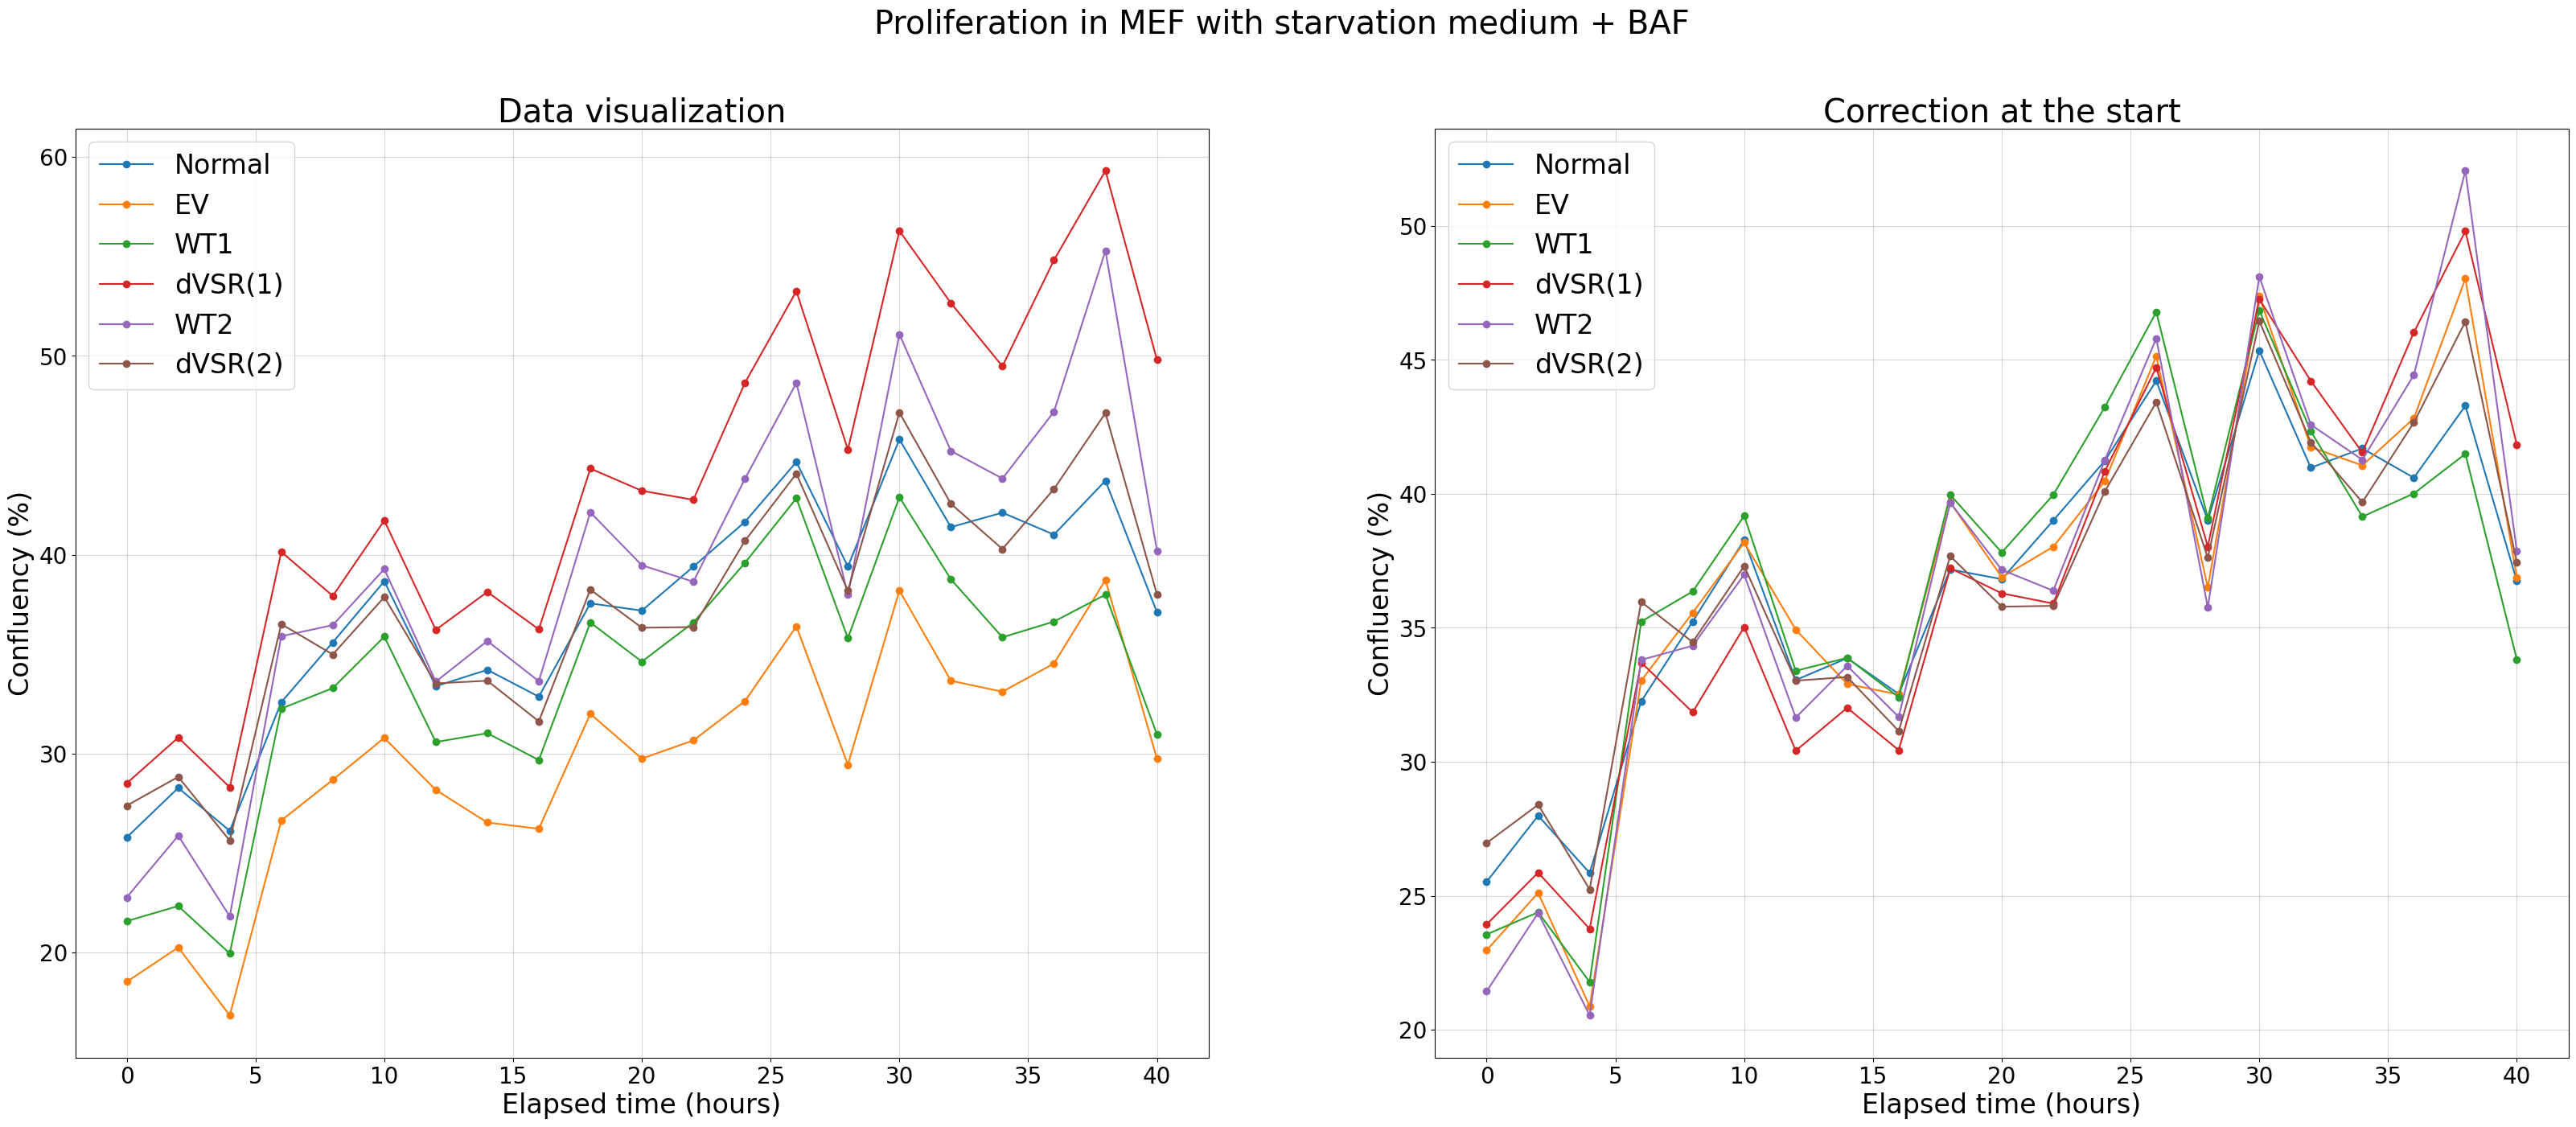

In [62]:
#Visualization of all data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['rich_dmso', 'rich_baf', 'starv_dmso', 'starv_baf']

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]
    drug = drugs[i]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    for column in col_selection:     
        label_ = column.split(' ')[0]
        
        #graph 1, data visualization
        ax[0].plot(prolif_df['Elapsed'], prolif_df[column], 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Data visualization")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
               
        #graph 2, Correction at the start
        ax[1].plot(prolif_df['Elapsed'], corrected_data[column], 'o-', label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Correction at the start")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
    print()

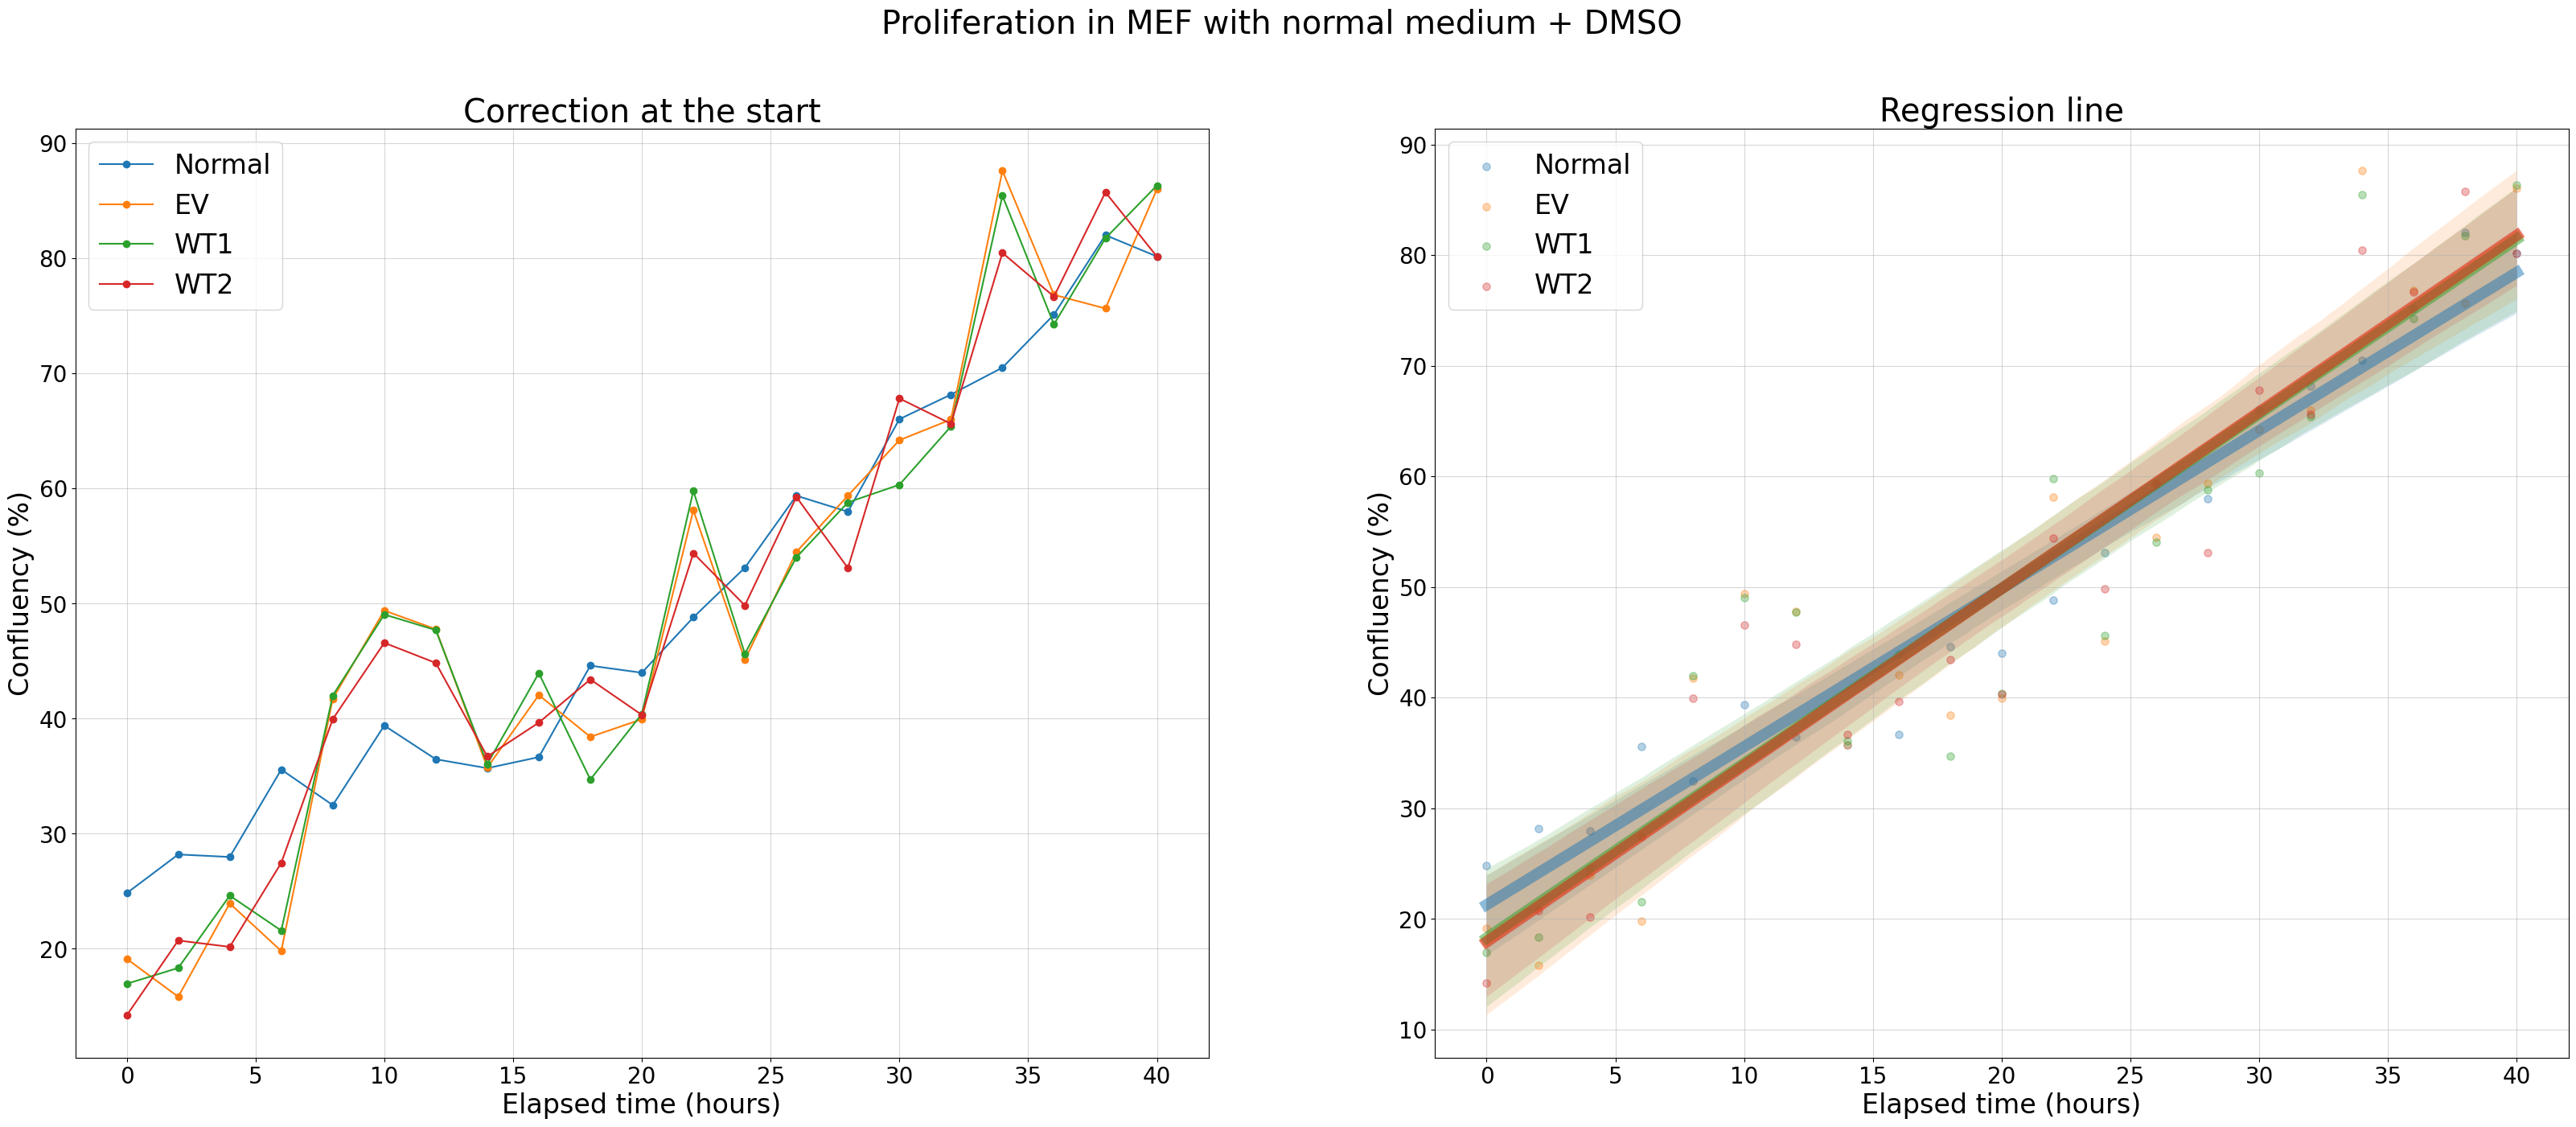

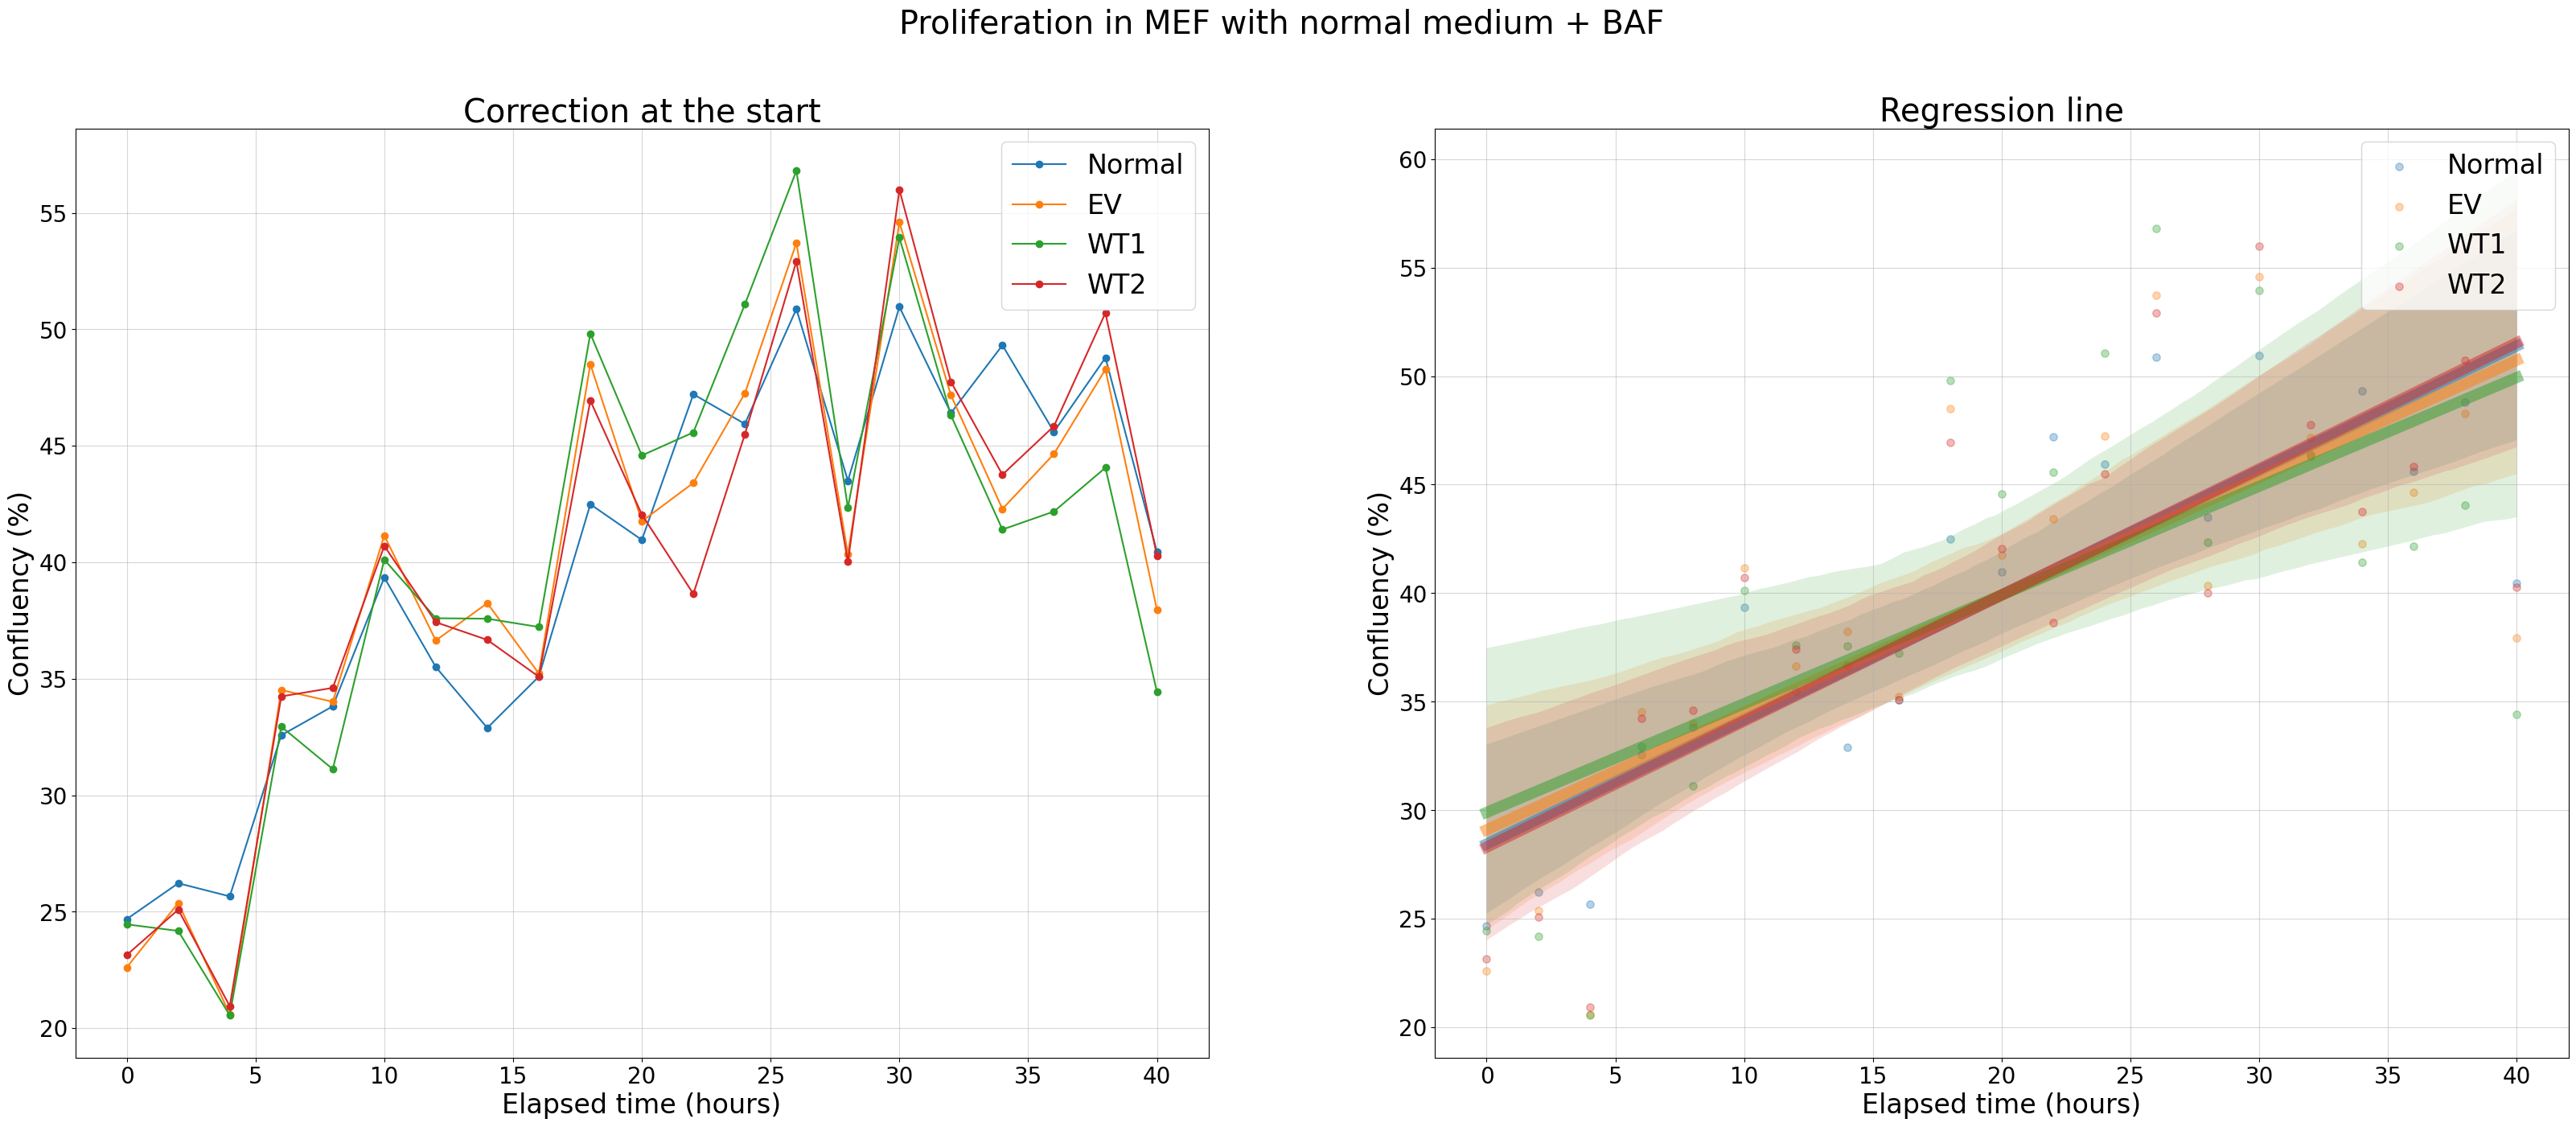

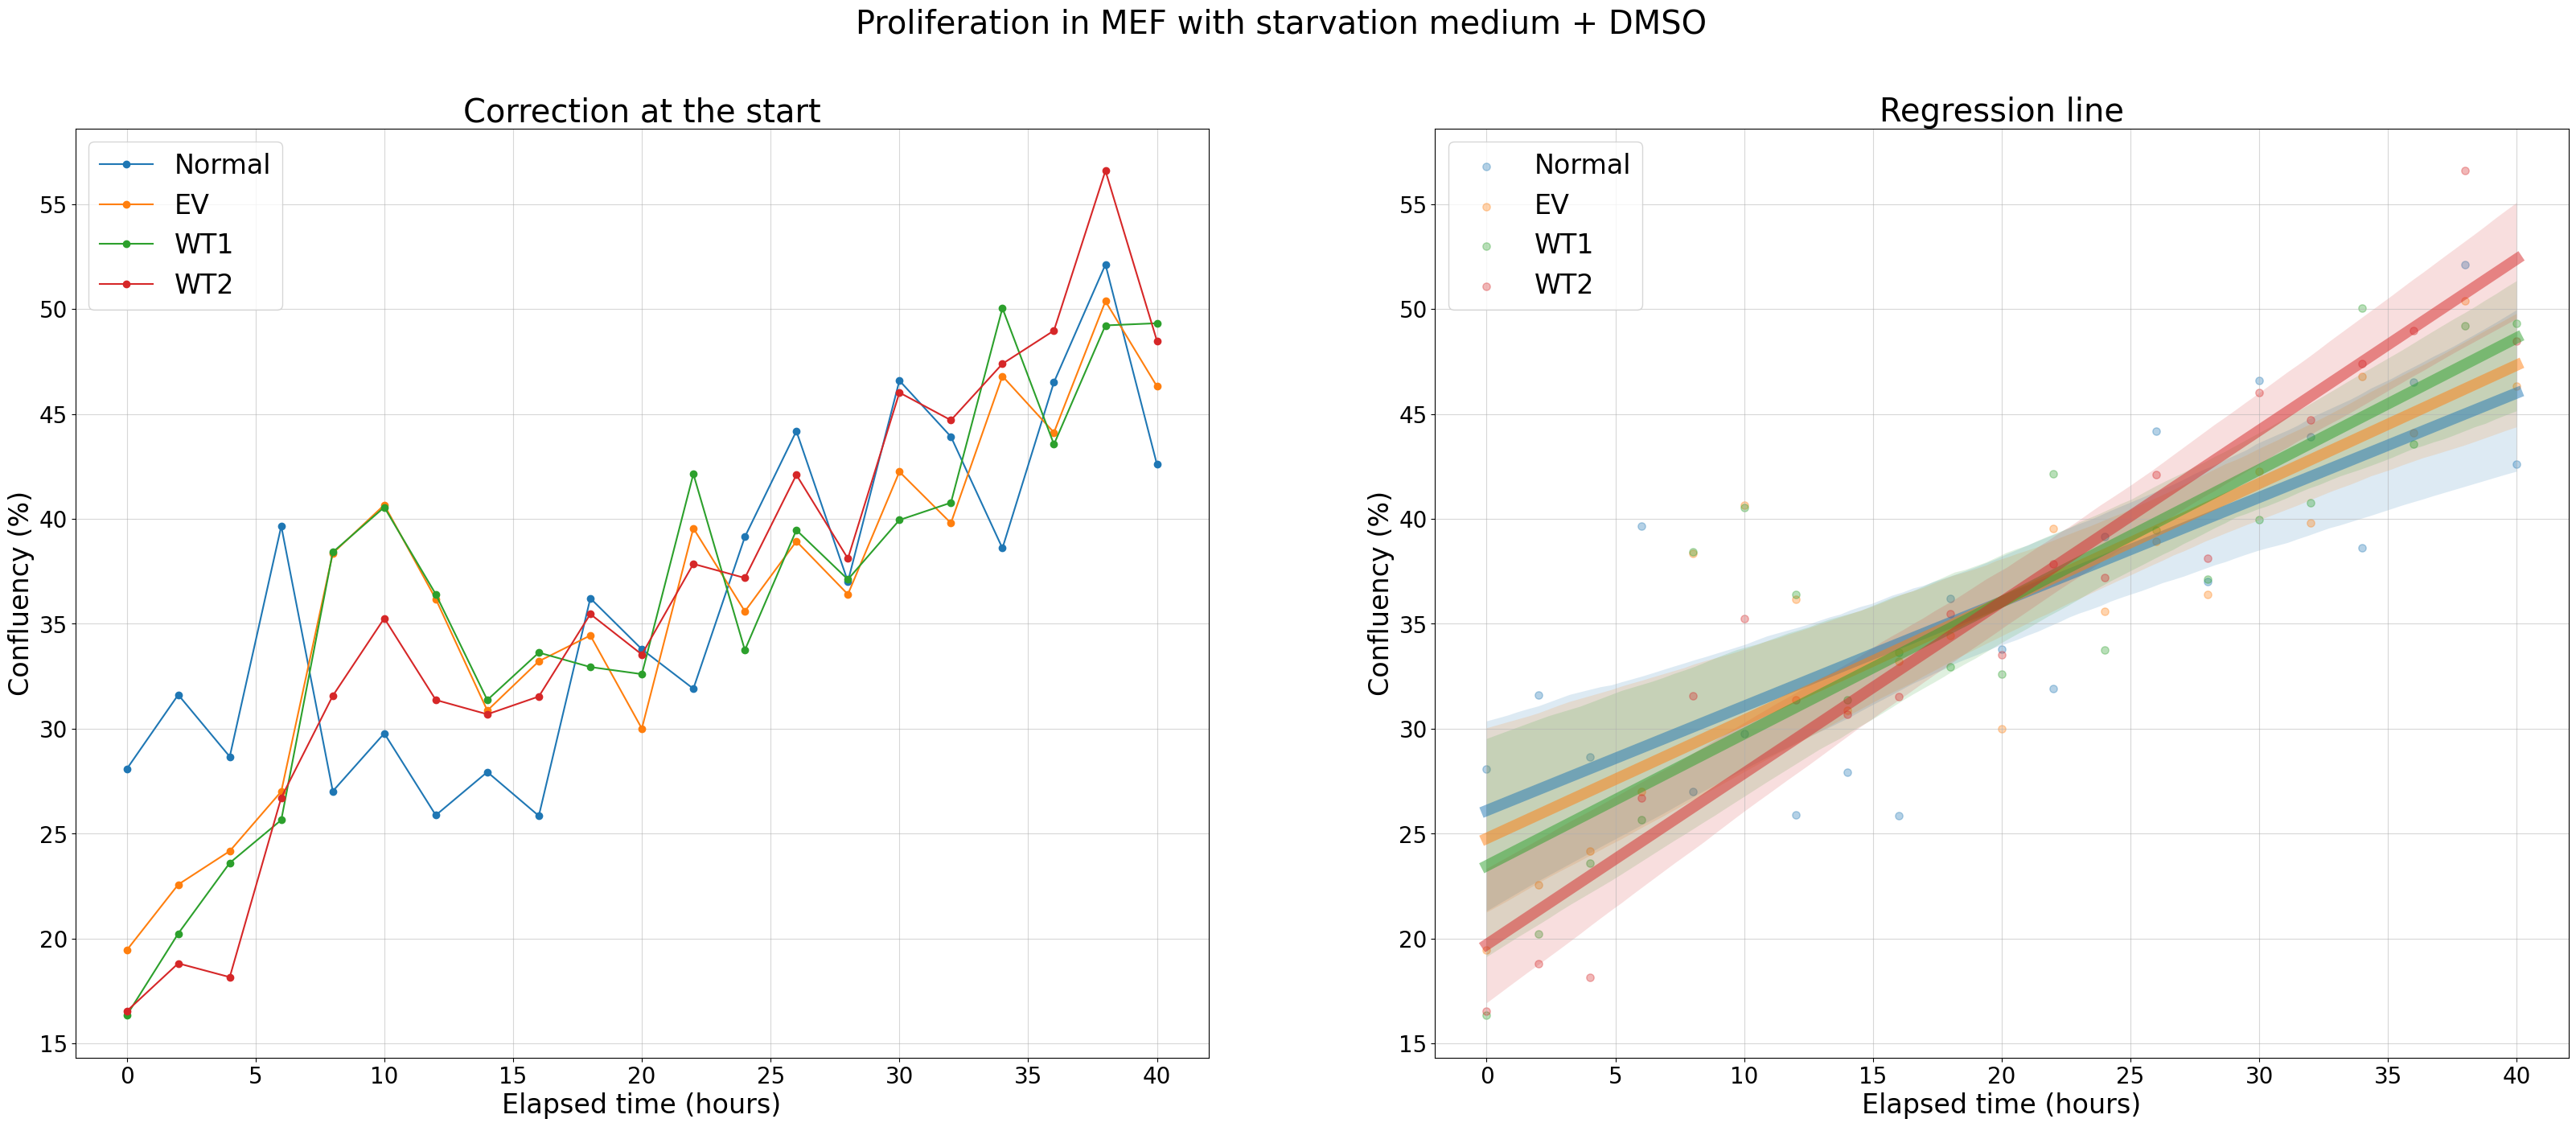

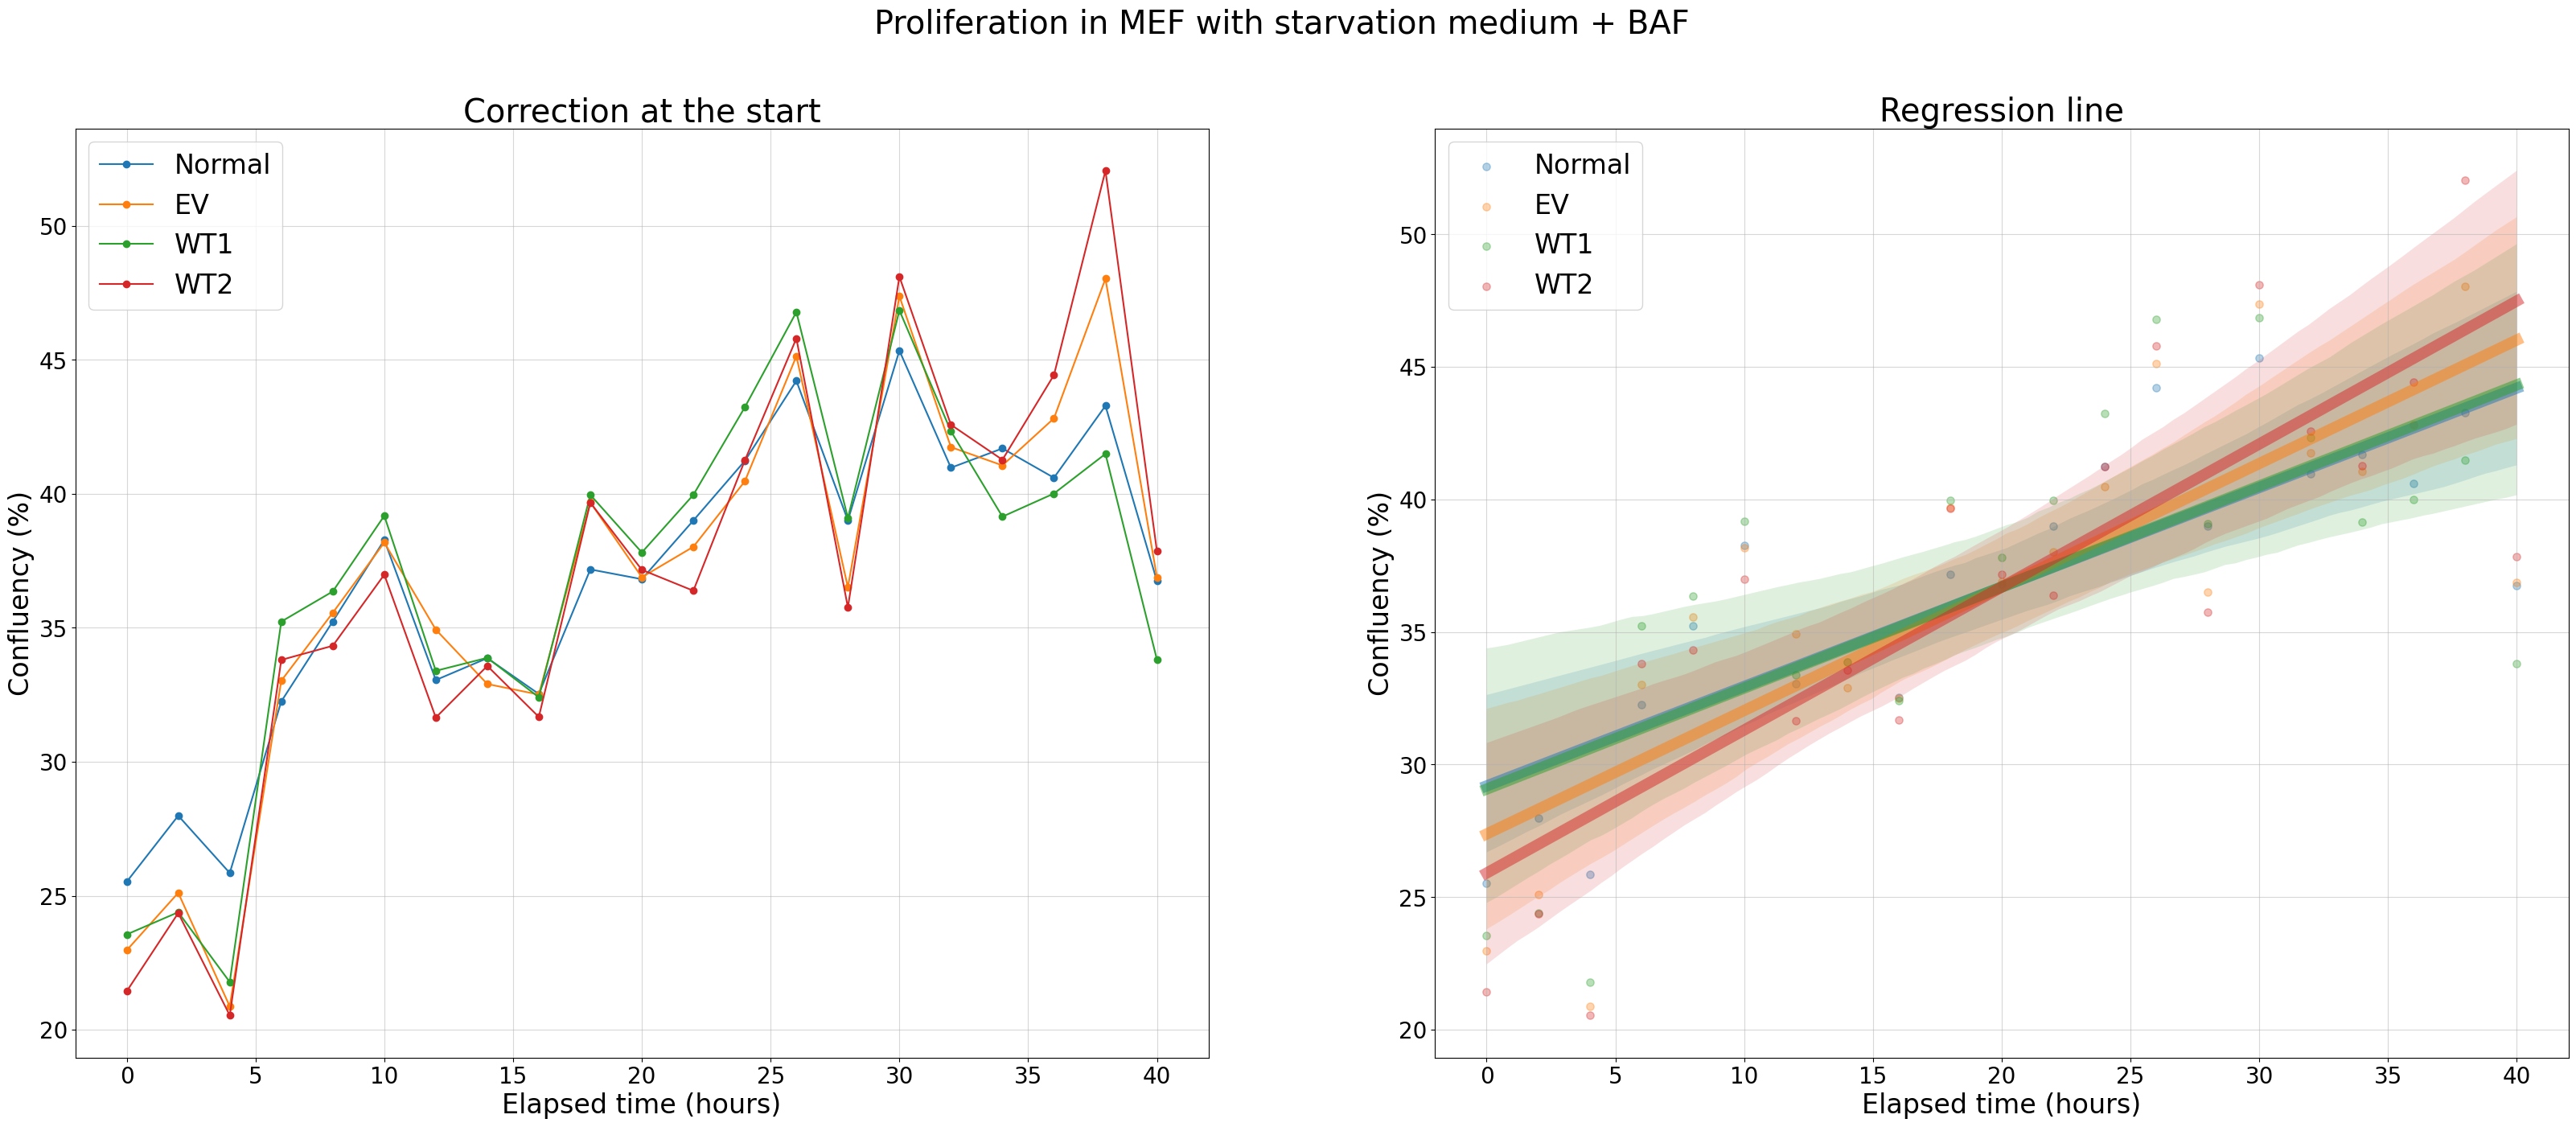

In [63]:
#Visualization of all data and regression line
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['rich_dmso', 'rich_baf', 'starv_dmso', 'starv_baf']

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]
    drug = drugs[i]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    list_ = [0,1,2,4] #represent norm/EV/WT1/WT2 delete list_ to have all
    for column in col_selection[list_]:     
        label_ = column.split(' ')[0]
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
        
        #graph 2, Correction at the start
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        ax[0].plot(x, y, 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Correction at the start")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        #graph 3, Regression lines
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        seaborn.regplot(x=x, y=y,scatter=True, line_kws={'linewidth':10, 'alpha':0.5},
                        scatter_kws={'s':45, 'alpha':1/3}, label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Regression line")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
        
        #save the graphs
        path = output_file_directory + 'ATG7/Proliferation/exp3/graph_exp3_'    
#         fig.savefig(path+drug+'.svg')
        print()

In [64]:
# # I have 6 cell lines per condition and 4 conditions
# # Only keep WT, EV, WT1, WT2
# prolif_rich_DMSO = prolif_rich_DMSO[[0,1,2,4]]
# prolif_rich_BAF = prolif_rich_BAF[[0,1,2,4]]
# prolif_starv_DMSO = prolif_starv_DMSO[[0,1,2,4]]
# prolif_starv_BAF = prolif_starv_BAF[[0,1,2,4]]

# prolif_starv_BAF

In [65]:
#Create df with corrected data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['dmso', 'baf', 'dmso', 'baf']

corrected_dfs = []

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]

    label_ = column.split(' ')[0]
              
    ##Correction
    shift = prolif_df[col_selection].mean()   #list of means for all columns
    general_mean = prolif_df[col_selection].mean().mean() #mean of means
    relative_mu = shift/general_mean #correction to apply for each column
    corrected_data = prolif_df[col_selection]/relative_mu #corrected data
    corrected_dfs.append(corrected_data)

In [66]:
#convert corrected results as dataframe
corrected_combined_dfs = pandas.concat(corrected_dfs, axis=1)
corrected_combined_dfs.insert(0, "Elapsed", prolif_df["Elapsed"])

corrected_combined_dfs.head()

Elapsed  Normal + DMEM + DMSO  EV + DMEM + DMSO  WT1 + DMEM + DMSO  \
0      0.0             24.827621         19.121498          16.952718   
1      2.0             28.191660         15.826239          18.327540   
2      4.0             27.973233         23.936591          24.615676   
3      6.0             35.571557         19.798761          21.574966   
4      8.0             32.477849         41.725286          42.011005   

   dVSR(1) + DMEM + DMSO  WT2 + DMEM + DMSO  dVSR(2) + DMEM + DMSO  \
0              21.776676          14.207729              22.515510   
1              23.412025          20.715255              24.282849   
2              24.850588          20.160626              24.176038   
3              29.689367          27.465205              28.210018   
4              37.106265          39.954178              37.871486   

   Normal + DMEM + BAF  EV + DMEM + BAF  WT1 + DMEM + BAF  ...  \
0            24.681962        22.609582         24.456074  ...   
1            26.221347        25.372982         24.175713  ...   
2            25.658057        20.597996         20.549535  ...   
3            32.573208        34.517435         32.946641  ...   
4            33.819139        34.012435         31.120590  ...   

   WT1 + Starvation + DMSO  dVSR(1) + Starvation + DMSO  \
0                16.337544                    20.391005   
1                20.236871                    19.852360   
2                23.602884                    22.619938   
3                25.648450                    25.978634   
4                38.411032                    34.349153   

   WT2 + Starvation + DMSO  dVSR(2) + Starvation + DMSO  \
0                16.536008                    21.011525   
1                18.814806                    24.063675   
2                18.160012                    21.632704   
3                26.714090                    30.541154   
4                31.566438                    31.800649   

   Normal + Starvation + BAF  EV + Starvation + BAF  WT1 + Starvation + BAF  \
0                  25.525177              22.968894               23.559129   
1                  27.990198              25.111977               24.388104   
2                  25.852233              20.874995               21.784329   
3                  32.252615              33.025384               35.231275   
4                  35.236411              35.561398               36.356824   

   dVSR(1) + Starvation + BAF  WT2 + Starvation + BAF  \
0                   23.934832               21.438127   
1                   25.865455               24.358052   
2                   23.766848               20.539738   
3                   33.707680               33.802343   
4                   31.847534               34.329495   

   dVSR(2) + Starvation + BAF  
0                   26.972563  
1                   28.398752  
2                   25.240210  
3                   35.966901  
4                   34.464390  

[5 rows x 25 columns]

In [67]:
corrected_combined_dfs

Elapsed  Normal + DMEM + DMSO  EV + DMEM + DMSO  WT1 + DMEM + DMSO  \
0       0.0             24.827621         19.121498          16.952718   
1       2.0             28.191660         15.826239          18.327540   
2       4.0             27.973233         23.936591          24.615676   
3       6.0             35.571557         19.798761          21.574966   
4       8.0             32.477849         41.725286          42.011005   
5      10.0             39.393021         49.387052          49.046649   
6      12.0             36.464951         47.772219          47.688411   
7      14.0             35.690868         35.747555          36.053635   
8      16.0             36.652219         42.042557          43.947829   
9      18.0             44.598522         38.411730          34.704480   
10     20.0             43.983643         39.944083          40.402461   
11     22.0             48.795307         58.105685          59.789127   
12     24.0             53.111210         45.095454          45.638081   
13     26.0             59.370653         54.479586          54.012046   
14     28.0             57.975735         59.369611          58.787523   
15     30.0             66.022426         64.193835          60.322028   
16     32.0             68.156970         65.990643          65.388314   
17     34.0             70.500770         87.611671          85.444669   
18     36.0             75.106894         76.827362          74.255557   
19     38.0             82.015541         75.639695          81.743687   
20     40.0             80.157405         86.010942          86.331652   

    dVSR(1) + DMEM + DMSO  WT2 + DMEM + DMSO  dVSR(2) + DMEM + DMSO  \
0               21.776676          14.207729              22.515510   
1               23.412025          20.715255              24.282849   
2               24.850588          20.160626              24.176038   
3               29.689367          27.465205              28.210018   
4               37.106265          39.954178              37.871486   
5               45.372616          46.584909              44.960281   
6               43.048562          44.836100              42.215421   
7               35.380280          36.706283              38.036150   
8               39.355551          39.649579              38.536558   
9               41.357585          43.401941              46.571681   
10              41.426285          40.319423              42.555022   
11              54.970482          54.379949              52.891572   
12              49.481108          49.833295              52.570696   
13              58.829689          59.261274              61.097750   
14              55.159378          53.085629              52.693288   
15              65.122164          67.822285              67.484839   
16              64.567681          65.620500              65.889637   
17              78.813465          80.472929              74.322699   
18              73.270170          76.676691              73.811157   
19              84.000427          85.737317              80.253801   
20              80.047693          80.146960              76.091603   

    Normal + DMEM + BAF  EV + DMEM + BAF  WT1 + DMEM + BAF  ...  \
0             24.681962        22.609582         24.456074  ...   
1             26.221347        25.372982         24.175713  ...   
2             25.658057        20.597996         20.549535  ...   
3             32.573208        34.517435         32.946641  ...   
4             33.819139        34.012435         31.120590  ...   
5             39.348808        41.148653         40.113294  ...   
6             35.505669        36.642412         37.598520  ...   
7             32.889108        38.246110         37.578116  ...   
8             35.092431        35.227339         37.223265  ...   
9             42.491193        48.503094         49.816967  ...   
10            40.962455        41.760854         44.586567  ...   
11      

# let compare at 30 hours

In [68]:
df_30h = corrected_combined_dfs[corrected_combined_dfs['Elapsed'] == 30.0]
df_30h = df_30h.melt(id_vars=["Elapsed"], var_name="conditions")
df_30h['experiment'] = "exp3"
df_30h

Elapsed                   conditions      value experiment
0      30.0         Normal + DMEM + DMSO  66.022426       exp3
1      30.0             EV + DMEM + DMSO  64.193835       exp3
2      30.0            WT1 + DMEM + DMSO  60.322028       exp3
3      30.0        dVSR(1) + DMEM + DMSO  65.122164       exp3
4      30.0            WT2 + DMEM + DMSO  67.822285       exp3
5      30.0        dVSR(2) + DMEM + DMSO  67.484839       exp3
6      30.0          Normal + DMEM + BAF  50.965762       exp3
7      30.0              EV + DMEM + BAF  54.597347       exp3
8      30.0             WT1 + DMEM + BAF  53.938420       exp3
9      30.0         dVSR(1) + DMEM + BAF  55.322492       exp3
10     30.0             WT2 + DMEM + BAF  55.990344       exp3
11     30.0         dVSR(2) + DMEM + BAF  54.869959       exp3
12     30.0   Normal + Starvation + DMSO  46.587781       exp3
13     30.0       EV + Starvation + DMSO  42.243112       exp3
14     30.0      WT1 + Starvation + DMSO  39.944052       exp3
15     30.0  dVSR(1) + Starvation + DMSO  41.955761       exp3
16     30.0      WT2 + Starvation + DMSO  46.016852       exp3
17     30.0  dVSR(2) + Starvation + DMSO  44.527575       exp3
18     30.0    Normal + Starvation + BAF  45.343260       exp3
19     30.0        EV + Starvation + BAF  47.372368       exp3
20     30.0       WT1 + Starvation + BAF  46.845241       exp3
21     30.0   dVSR(1) + Starvation + BAF  47.263176       exp3
22     30.0       WT2 + Starvation + BAF  48.102416       exp3
23     30.0   dVSR(2) + Starvation + BAF  46.446235       exp3

In [69]:
df_30h.insert(1, "Drug", df_30h['conditions'].str.split('+').str[2])
df_30h.insert(1, "Medium", df_30h['conditions'].str.split('+').str[1])
df_30h.insert(1, "samples", df_30h['conditions'].str.split('+').str[0])

df_30h.pop("conditions")
df_30h

Elapsed   samples        Medium   Drug      value experiment
0      30.0   Normal          DMEM    DMSO  66.022426       exp3
1      30.0       EV          DMEM    DMSO  64.193835       exp3
2      30.0      WT1          DMEM    DMSO  60.322028       exp3
3      30.0  dVSR(1)          DMEM    DMSO  65.122164       exp3
4      30.0      WT2          DMEM    DMSO  67.822285       exp3
5      30.0  dVSR(2)          DMEM    DMSO  67.484839       exp3
6      30.0   Normal          DMEM     BAF  50.965762       exp3
7      30.0       EV          DMEM     BAF  54.597347       exp3
8      30.0      WT1          DMEM     BAF  53.938420       exp3
9      30.0  dVSR(1)          DMEM     BAF  55.322492       exp3
10     30.0      WT2          DMEM     BAF  55.990344       exp3
11     30.0  dVSR(2)          DMEM     BAF  54.869959       exp3
12     30.0   Normal    Starvation    DMSO  46.587781       exp3
13     30.0       EV    Starvation    DMSO  42.243112       exp3
14     30.0      WT1    Starvation    DMSO  39.944052       exp3
15     30.0  dVSR(1)    Starvation    DMSO  41.955761       exp3
16     30.0      WT2    Starvation    DMSO  46.016852       exp3
17     30.0  dVSR(2)    Starvation    DMSO  44.527575       exp3
18     30.0   Normal    Starvation     BAF  45.343260       exp3
19     30.0       EV    Starvation     BAF  47.372368       exp3
20     30.0      WT1    Starvation     BAF  46.845241       exp3
21     30.0  dVSR(1)    Starvation     BAF  47.263176       exp3
22     30.0      WT2    Starvation     BAF  48.102416       exp3
23     30.0  dVSR(2)    Starvation     BAF  46.446235       exp3

In [70]:
df_dmem_30h = df_30h.loc[:11]
df_starvation_30h = df_30h.loc[12:]

In [71]:
#save Corrected_data
path = output_file_directory + 'ATG7/MEF_Huh7/Proliferation/data_for_input/'
df_dmem_30h.to_csv(path+'df_dmem_30h_exp3.csv',sep = ",", index=False)
df_starvation_30h.to_csv(path+'df_starvation_30h_exp3.csv',sep = ",", index=False)